# AI_HW02. Deep Feedforward Neural Networks
## 20160418 이지현

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
from os.path import join
import warnings
warnings.filterwarnings("ignore")

In [2]:
datax = pd.read_csv('./data/abalone.csv', names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
datax.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
print(datax.shape)

(4177, 9)


In [4]:
datay = pd.DataFrame(datax['Sex'])
datay.head()

,Sex
0,M
1,M
2,F
3,M
4,I


In [5]:
del datax['Sex']
datax.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Requirement 2
## 변수 정규화를 실행한다. (sklearn.preprocessing.MinMaxScaler 사용)

In [6]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(datax)

df = datax.copy()

datax = min_max_scaler.transform(datax)
datax = pd.DataFrame(datax, columns=df.columns, index=list(df.index.values))
datax.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


## Requirement 1
## Data를 train:test로 분할한다.

In [7]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.3, random_state=111)

## Requirement 2
## 2. Sklearn을 이용해서 Classifier A를 만든다

In [8]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(800,))
clf.fit(trnx, trny)
tsty_hat = clf.predict(tstx)

In [9]:
print(clf)
print(clf.loss_curve_)
print(tsty[0:10])
print(tsty_hat[0:10])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(800,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
[1.0645660645231048, 0.9992975466298867, 0.9458143274116256, 0.9123318105581469, 0.8984586741689821, 0.8924219730321208, 0.8900876541451586, 0.8857835735013092, 0.8836998894837204, 0.8823334875795745, 0.8830346264728769, 0.8790190372696248, 0.8781944909176989, 0.8796428660404761, 0.8751617950978402, 0.8746203407633758, 0.8747267873553679, 0.8735741865982614, 0.8735372721947722, 0.8702729301295243, 0.8714525117727925, 0.8706019080271559, 0.870461198176522, 0.8678264540045837, 0.8671153394361087, 0.8

## Requirement 5-1
## A의 test data에 대한 accuracy

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(tsty, tsty_hat)

0.569377990430622

## Requirement 4
## keras를 이용해서 Classifier B를 만든다

In [37]:
import tensorflow as tf
import keras
from keras import layers, models, optimizers
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

In [38]:
t = Tokenizer()
t.fit_on_texts(['M','F','I'])
datay = datay.reset_index(drop=True)
encoded=t.texts_to_sequences(datay['Sex'])

one_hot = to_categorical(encoded)
print(datay[0:10])
print(one_hot[0:10,:])

trnx, tstx, trny, tsty = train_test_split(datax, one_hot, test_size=0.3, random_state=111)

  Sex
0   M
1   M
2   F
3   M
4   I
5   I
6   F
7   F
8   M
9   F
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [39]:
print(trnx.shape, tstx.shape, trny.shape, tsty.shape)

(2923, 8) (1254, 8) (2923, 4) (1254, 4)


In [44]:
input_shape = (8,)

mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units = 800, activation = 'relu', input_shape=input_shape))
mlp_model.add(layers.Dense(units = 1000, activation = 'relu'))
mlp_model.add(layers.Dense(units = 500, activation = 'sigmoid'))
mlp_model.add(layers.Dense(units = 4, activation = 'softmax'))

mlp_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [45]:
mlp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 800)               7200      
_________________________________________________________________
dense_26 (Dense)             (None, 1000)              801000    
_________________________________________________________________
dense_27 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 2004      
Total params: 1,310,704
Trainable params: 1,310,704
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = mlp_model.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=40, epochs=100)

Train on 2923 samples, validate on 1254 samples
Epoch 1/100
2923/2923 [==============================] - 1s 183us/step - loss: 0.9437 - acc: 0.5036 - val_loss: 0.8844 - val_acc: 0.5375
Epoch 2/100
2923/2923 [==============================] - 0s 84us/step - loss: 0.8892 - acc: 0.5310 - val_loss: 0.8925 - val_acc: 0.5088
Epoch 3/100
2923/2923 [==============================] - 0s 83us/step - loss: 0.8803 - acc: 0.5344 - val_loss: 0.9423 - val_acc: 0.5016
Epoch 4/100
2923/2923 [==============================] - 0s 83us/step - loss: 0.9025 - acc: 0.5251 - val_loss: 0.8470 - val_acc: 0.5367
Epoch 5/100
2923/2923 [==============================] - 0s 84us/step - loss: 0.8815 - acc: 0.5251 - val_loss: 0.8671 - val_acc: 0.5391
Epoch 6/100
2923/2923 [==============================] - 0s 84us/step - loss: 0.8684 - acc: 0.5351 - val_loss: 0.8994 - val_acc: 0.5207
Epoch 7/100
2923/2923 [==============================] - 0s 85us/step - loss: 0.8725 - acc: 0.5337 - val_loss: 0.8653 - val_acc: 0.5271

2923/2923 [==============================] - 0s 82us/step - loss: 0.8370 - acc: 0.5706 - val_loss: 0.8800 - val_acc: 0.5478
Epoch 61/100
2923/2923 [==============================] - 0s 83us/step - loss: 0.8498 - acc: 0.5641 - val_loss: 0.8219 - val_acc: 0.5758
Epoch 62/100
2923/2923 [==============================] - 0s 83us/step - loss: 0.8378 - acc: 0.5587 - val_loss: 0.8257 - val_acc: 0.5734
Epoch 63/100
2923/2923 [==============================] - 0s 84us/step - loss: 0.8346 - acc: 0.5693 - val_loss: 0.8321 - val_acc: 0.5630
Epoch 64/100
2923/2923 [==============================] - 0s 84us/step - loss: 0.8419 - acc: 0.5655 - val_loss: 0.8653 - val_acc: 0.5431
Epoch 65/100
2923/2923 [==============================] - 0s 84us/step - loss: 0.8410 - acc: 0.5638 - val_loss: 0.8266 - val_acc: 0.5574
Epoch 66/100
2923/2923 [==============================] - 0s 83us/step - loss: 0.8349 - acc: 0.5522 - val_loss: 0.8315 - val_acc: 0.5670
Epoch 67/100
2923/2923 [==============================

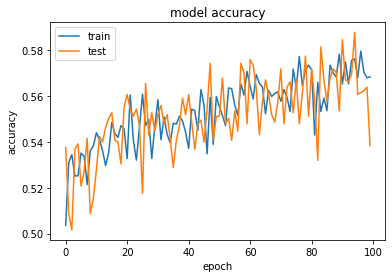

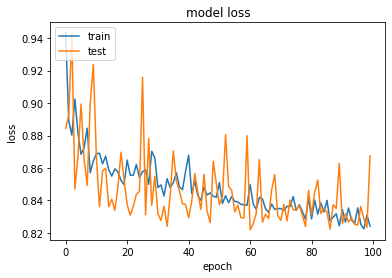

In [47]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()